## Number crunching for 2020 tax year

In [1]:
import sympy as sp
import matplotlib

|      |        |
| -----|:-------| 
|![tax_brackets](https://i2.wp.com/moneysavvymindset.com/wp-content/uploads/2019/11/Federal-income-tax-rates-for-single-unmarried-2020.png?resize=567%2C228&ssl=1)| This table is for the federal income tax levels. Note that value does not include any income deductions, state tax, or FICA Tax<br><br>|


## Lets make a piece wise equation from the table

In [2]:
income = sp.symbols('income')
fed_tax=sp.Piecewise((0,                             income<0),
                     (0.10*income,                   income<=9875), 
                     (987.50  + 0.12*(income-9875),  income<=40125),
                     (4617.50 + 0.22*(income-40125), income<=85525),
                     (14605.5 + 0.24*(income-85525), income<=163000),
                     (33271.5 + 0.32*(income-163300),income<=207350),
                     (47367.5 + 0.35*(income-207350),income<=518400),
                     (156235  + 0.37*(income-518401),True))

In [3]:
matplotlib.rc('lines', linewidth=2, color='g')
matplotlib.rcParams['axes.grid'] = True
plot0=sp.plotting.plot(fed_tax, (income, 0, 600000),
                       title='Taxable Income vs. Income Tax Owed', ylabel='Taxes owed($)', xlabel='Taxable Income($)')

<Figure size 640x480 with 1 Axes>

#### Verify that we can input an income level and get amount owed in federal income taxes

In [4]:
taxes_owed = fed_tax.subs(income, 123456)
taxes_owed

23708.9400000000

### Add in FICA: Social Security and Medicare taxes
- [fica tax breakdown](https://www.ssa.gov/news/press/factsheets/colafacts2020.pdf)
- [additional medicare tax](https://www.irs.gov/businesses/small-businesses-self-employed/questions-and-answers-for-the-additional-medicare-tax)

In [5]:
ss_tax = sp.Piecewise((0,                   income<0),
                      (0.062*income,         income<200000),
                      ((0.062+0.009)*income, income>=200000))

medicare_tax = 0.0145*income

total_fed_tax = fed_tax + ss_tax + medicare_tax
total_fed_tax

0.0145*income + Piecewise((0, income < 0), (0.062*income, income < 200000), (0.071*income, True)) + Piecewise((0, income < 0), (0.1*income, income <= 9875), (0.12*income - 197.5, income <= 40125), (0.22*income - 4210.0, income <= 85525), (0.24*income - 5920.5, income <= 163000), (0.32*income - 18984.5, income <= 207350), (0.35*income - 25205.0, income <= 518400), (0.37*income - 35573.37, True))

----
## Let's look at taxed percenage as a function of income

In [6]:
effective_tax_rate = total_fed_tax.subs(income, income)/income

In [7]:
effective_tax_rate.subs(income,300000)

0.351483333333333

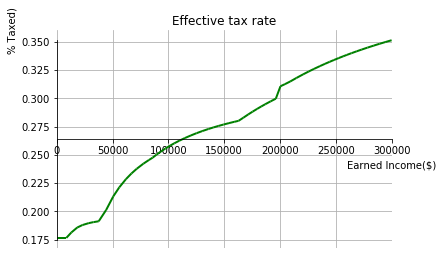

In [8]:
matplotlib.rc('lines', linewidth=2, color='g')
plot1=sp.plotting.plot(effective_tax_rate, (income, 0, 300000),
                 title='Effective tax rate', ylabel='% Taxed)', xlabel='Earned Income($)')

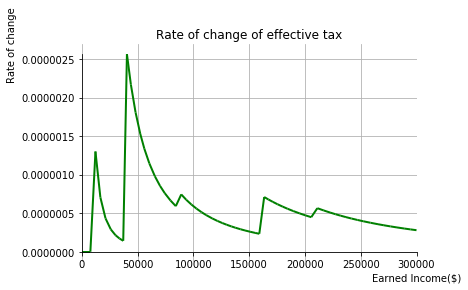

In [9]:
plot2=sp.plotting.plot(sp.diff(effective_tax_rate), (income, 0, 300000),
                 title='Rate of change of effective tax', ylabel='Rate of change', xlabel='Earned Income($)')

#### overlay the rate of change to see the areas of most benefit

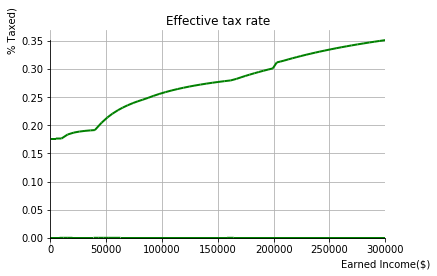

In [10]:
plot1.append(plot2[0])
plot1.show()

 ## *Goal is be to minimize the effective tax rate*